In [2]:
%env SPARK_HOME=/Users/victoriazarubina/Downloads/spark-3.1.1-bin-hadoop2.7
%config IPCompleter.greedy=True
#!pip install findspark
#!pip install pyspark
import findspark
#findspark.init("/Users/victoriazarubina/Downloads/spark-3.1.1-bin-hadoop2.7")
findspark.find()

import pyspark

findspark.init()
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np

env: SPARK_HOME=/Users/victoriazarubina/Downloads/spark-3.1.1-bin-hadoop2.7


In [3]:
#get spark session, close it if it already exists, otherwise create a new one
try:
    if sc is None:
        print("sc is not defined")
except Exception:
        print("error found, recovering and creating spark connection")
else:
        print("old sc found, stopping it now")    
        sc.stop()
        print("stopped old sc")

conf = pyspark.SparkConf().setAppName('app').setMaster('local[2]')
sc = pyspark.SparkContext(conf=conf)

sc.setSystemProperty('spark.executor.memory','15g')
spark = SparkSession(sc)
"created spark session"
sc.version

error found, recovering and creating spark connection


'3.1.1'

In [4]:
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark.sql.types import * 
import pyspark.sql.functions as F
from pyspark.sql.functions import col, asc,desc
import matplotlib.pyplot as plt
import numpy as np
from pyspark.sql import SQLContext
from pyspark.mllib.stat import Statistics
import pandas as pd
from pyspark.sql.functions import udf
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler,StandardScaler
from pyspark.ml import Pipeline
from sklearn.metrics import confusion_matrix


In [5]:
#read in data
data = spark.read.csv("airline_2m.csv",
                     sep=",", inferSchema="true", header="true")

In [ ]:
data.show()

In [103]:
print((data.count(), len(data.columns)))

(2000000, 109)


In [107]:
data.select("Div3Airport","Div3AirportID","Div3AirportSeqID","Div3WheelsOn","Div3TotalGTime","Div3LongestGTime",
            "Div3WheelsOff","Div3TailNum").summary("count", "min", "25%", "75%", "max").show()

+-------+-----------+-------------+----------------+------------+--------------+----------------+-------------+-----------+
|summary|Div3Airport|Div3AirportID|Div3AirportSeqID|Div3WheelsOn|Div3TotalGTime|Div3LongestGTime|Div3WheelsOff|Div3TailNum|
+-------+-----------+-------------+----------------+------------+--------------+----------------+-------------+-----------+
|  count|          0|            0|               0|           0|             0|               0|            0|          0|
|    min|       null|         null|            null|        null|          null|            null|         null|       null|
|    25%|       null|         null|            null|        null|          null|            null|         null|       null|
|    75%|       null|         null|            null|        null|          null|            null|         null|       null|
|    max|       null|         null|            null|        null|          null|            null|         null|       null|
+-------

In [108]:
data.select("Div4Airport","Div4AirportID","Div4AirportSeqID","Div4WheelsOn","Div4TotalGTime","Div4LongestGTime",
            "Div4WheelsOff","Div4TailNum").summary("count", "min", "25%", "75%", "max").show()

+-------+-----------+-------------+----------------+------------+--------------+----------------+-------------+-----------+
|summary|Div4Airport|Div4AirportID|Div4AirportSeqID|Div4WheelsOn|Div4TotalGTime|Div4LongestGTime|Div4WheelsOff|Div4TailNum|
+-------+-----------+-------------+----------------+------------+--------------+----------------+-------------+-----------+
|  count|          0|            0|               0|           0|             0|               0|            0|          0|
|    min|       null|         null|            null|        null|          null|            null|         null|       null|
|    25%|       null|         null|            null|        null|          null|            null|         null|       null|
|    75%|       null|         null|            null|        null|          null|            null|         null|       null|
|    max|       null|         null|            null|        null|          null|            null|         null|       null|
+-------

In [109]:
data.select("Div5Airport","Div5AirportID","Div5AirportSeqID","Div5WheelsOn","Div5TotalGTime",
              "Div5LongestGTime","Div5WheelsOff","Div5TailNum").summary("count", "min", "25%", "75%", "max").show()

+-------+-----------+-------------+----------------+------------+--------------+----------------+-------------+-----------+
|summary|Div5Airport|Div5AirportID|Div5AirportSeqID|Div5WheelsOn|Div5TotalGTime|Div5LongestGTime|Div5WheelsOff|Div5TailNum|
+-------+-----------+-------------+----------------+------------+--------------+----------------+-------------+-----------+
|  count|          0|            0|               0|           0|             0|               0|            0|          0|
|    min|       null|         null|            null|        null|          null|            null|         null|       null|
|    25%|       null|         null|            null|        null|          null|            null|         null|       null|
|    75%|       null|         null|            null|        null|          null|            null|         null|       null|
|    max|       null|         null|            null|        null|          null|            null|         null|       null|
+-------

In [6]:
#all of these are empty
data_short = data.drop("Div3Airport","Div3AirportID","Div3AirportSeqID","Div3WheelsOn","Div3TotalGTime","Div3LongestGTime","Div3WheelsOff",
              "Div3TailNum","Div4Airport","Div4AirportID","Div4AirportSeqID","Div4WheelsOn","Div4TotalGTime","Div4LongestGTime",
              "Div4WheelsOff","Div4TailNum","Div5Airport","Div5AirportID","Div5AirportSeqID","Div5WheelsOn","Div5TotalGTime",
              "Div5LongestGTime","Div5WheelsOff","Div5TailNum")

In [111]:
print((data_short.count(), len(data_short.columns)))

(2000000, 85)


In [7]:
#dropping more columns
df = data_short.drop("Quarter","FlightDate","DOT_ID_Reporting_Airline","Div1Airport","Div1AirportID",
                     "IATA_CODE_Reporting_Airline","Tail_Number","Flight_Number_Reporting_Airline","OriginAirportID","OriginAirportSeqID",
                     "OriginCityMarketID","Origin","OriginCityName","OriginState","OriginStateFips","OriginStateName","OriginWac","DestAirportID",
                     "DestAirportSeqID","DestCityMarketID","Dest","DestCityName","DestState","DestStateFips","DestStateName","DestWac",
                     "CRSDepTime","DepTime","DepDelayMinutes","DepDel15","DepartureDelayGroups","DepTimeBlk","TaxiOut","WheelsOff",
                     "WheelsOn","TaxiIn","CRSArrTime","ArrTime","ArrDelayMinutes","ArrDel15","ArrivalDelayGroups","ArrTimeBlk",
                     "Cancelled","CancellationCode","Diverted","CRSElapsedTime","ActualElapsedTime","AirTime","Flights","Distance",
                     "DistanceGroup","CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay","FirstDepTime",
                     "TotalAddGTime","LongestAddGTime","DivAirportLandings","DivReachedDest","DivActualElapsedTime","DivArrDelay","DivDistance","Div1Airport"
                     "Div1AirportID","Div1AirportSeqID","Div1WheelsOn","Div1TotalGTime","Div1LongestGTime","Div1WheelsOff","Div1TailNum","Div2Airport",
                     "Div2AirportID","Div2AirportSeqID","Div2WheelsOn","Div2TotalGTime","Div2LongestGTime","Div2WheelsOff","Div2TailNum")



In [150]:
#dropping more columns
df_w_arrdelay15 = data_short.drop("Quarter","FlightDate","DOT_ID_Reporting_Airline","Div1Airport","Div1AirportID",
                     "IATA_CODE_Reporting_Airline","Tail_Number","Flight_Number_Reporting_Airline","OriginAirportID","OriginAirportSeqID",
                     "OriginCityMarketID","Origin","OriginCityName","OriginState","OriginStateFips","OriginStateName","OriginWac","DestAirportID",
                     "DestAirportSeqID","DestCityMarketID","Dest","DestCityName","DestState","DestStateFips","DestStateName","DestWac",
                     "CRSDepTime","DepTime","DepDelayMinutes","DepDel15","DepartureDelayGroups","DepTimeBlk","TaxiOut","WheelsOff",
                     "WheelsOn","TaxiIn","CRSArrTime","ArrTime","ArrDelayMinutes","ArrivalDelayGroups","ArrTimeBlk",
                     "Cancelled","CancellationCode","Diverted","CRSElapsedTime","ActualElapsedTime","AirTime","Flights","Distance",
                     "DistanceGroup","CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay","FirstDepTime",
                     "TotalAddGTime","LongestAddGTime","DivAirportLandings","DivReachedDest","DivActualElapsedTime","DivArrDelay","DivDistance","Div1Airport"
                     "Div1AirportID","Div1AirportSeqID","Div1WheelsOn","Div1TotalGTime","Div1LongestGTime","Div1WheelsOff","Div1TailNum","Div2Airport",
                     "Div2AirportID","Div2AirportSeqID","Div2WheelsOn","Div2TotalGTime","Div2LongestGTime","Div2WheelsOff","Div2TailNum")



In [143]:
df.printSchema()

root
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- DayofMonth: integer (nullable = true)
 |-- DayOfWeek: integer (nullable = true)
 |-- Reporting_Airline: string (nullable = true)
 |-- DepDelay: double (nullable = true)
 |-- ArrDelay: double (nullable = true)



In [125]:
df.select("ArrDelay").summary("count", "min", "25%", "50%", "75%", "max").show()

+-------+--------+
|summary|ArrDelay|
+-------+--------+
|  count| 1958922|
|    min|  -706.0|
|    25%|   -10.0|
|    50%|    -1.0|
|    75%|    10.0|
|    max|  1898.0|
+-------+--------+



In [130]:
graphdf=df.toPandas()

In [151]:
graphdf_warrdel15=df_w_arrdelay15.toPandas()

In [164]:
graphdf[graphdf.ArrDelay > 0].shape[0]/graphdf.shape[0] *100

42.9777

In [154]:
len(graphdf[(graphdf['ArrDelay']>15)])

369940

<AxesSubplot:>

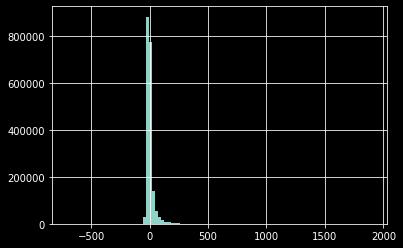

In [163]:
graphdf["ArrDelay"].hist(bins=100)

<AxesSubplot:>

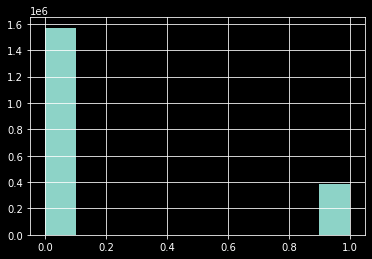

In [153]:
graphdf_warrdel15["ArrDel15"].hist()

<AxesSubplot:>

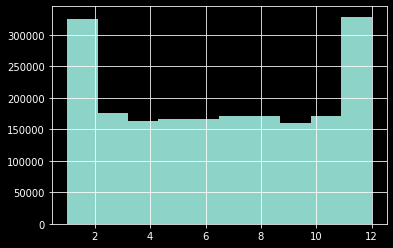

In [138]:
graphdf["Month"].hist()

<AxesSubplot:>

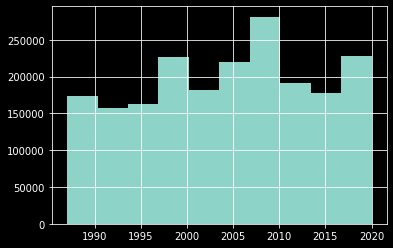

In [142]:
graphdf["Year"].hist()

<AxesSubplot:>

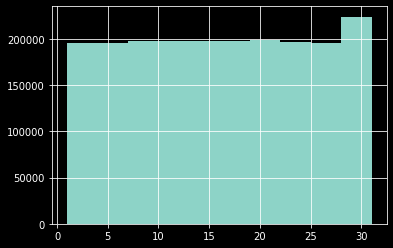

In [144]:
graphdf["DayofMonth"].hist()

<AxesSubplot:>

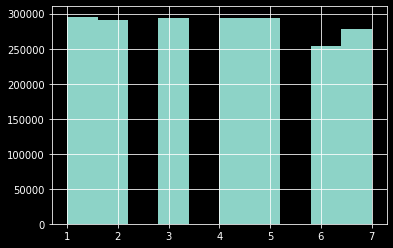

In [147]:
graphdf["DayOfWeek"].hist()

<AxesSubplot:>

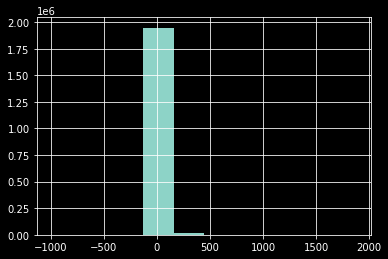

In [148]:
graphdf["DepDelay"].hist()

In [118]:
graphdf.head()

,Year,Month,DayofMonth,DayOfWeek,Reporting_Airline,DepDelay,ArrDelay
0,1998,1,2,5,NW,19.0,23.0
1,2009,5,28,4,FL,-2.0,0.0
2,2013,6,29,6,MQ,14.0,-3.0
3,2010,8,31,2,DL,0.0,-20.0
4,2006,1,15,7,US,51.0,32.0


<AxesSubplot:>

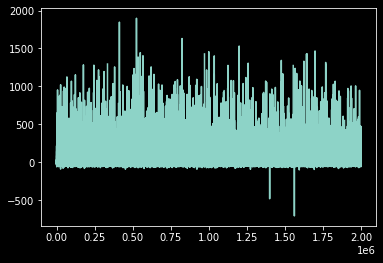

In [119]:
graphdf["ArrDelay"].plot()

<AxesSubplot:>

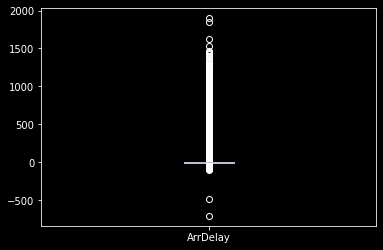

In [122]:
graphdf["ArrDelay"].plot.box()

+-------+--------+
|summary|ArrDelay|
+-------+--------+
|  count| 1958922|
|    min|  -706.0|
|    25%|   -10.0|
|    75%|    10.0|
|    max|  1898.0|
+-------+--------+



In [ ]:
#0 = if there IS a delay greater than 0 minutes 
#1 = if there IS NO delay

In [8]:
import pyspark.sql.functions as F
df = df.withColumn('Delay', F.when(df.ArrDelay > 0, 0).otherwise(1))

In [9]:
df = df.drop("ArrDelay")

In [10]:
df.show()

+----+-----+----------+---------+-----------------+--------+-----+
|Year|Month|DayofMonth|DayOfWeek|Reporting_Airline|DepDelay|Delay|
+----+-----+----------+---------+-----------------+--------+-----+
|1998|    1|         2|        5|               NW|    19.0|    0|
|2009|    5|        28|        4|               FL|    -2.0|    1|
|2013|    6|        29|        6|               MQ|    14.0|    1|
|2010|    8|        31|        2|               DL|     0.0|    1|
|2006|    1|        15|        7|               US|    51.0|    0|
|1995|   11|        29|        3|               DL|     0.0|    0|
|2006|    8|         7|        1|               CO|    -4.0|    0|
|2019|    6|        11|        2|               9E|   221.0|    0|
|2008|    8|         3|        7|               YV|     2.0|    0|
|2018|    2|         8|        4|               WN|    16.0|    0|
|1991|   11|        21|        4|               US|     2.0|    0|
|2014|    4|         3|        4|               WN|     0.0|  

In [168]:
df.printSchema()

root
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- DayofMonth: integer (nullable = true)
 |-- DayOfWeek: integer (nullable = true)
 |-- Reporting_Airline: string (nullable = true)
 |-- DepDelay: double (nullable = true)
 |-- Delay: integer (nullable = false)



In [11]:
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int']
df.select(numeric_features).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Year,2000000,2004.3137015,9.228929648419022,1987,2020
Month,2000000,6.500761,3.4434603743311256,1,12
DayofMonth,2000000,15.722019,8.77841227636865,1,31
DayOfWeek,2000000,3.9374455,1.9903694167955284,1,7
Delay,2000000,0.570223,0.49504429378129927,0,1


In [12]:
df.groupby("Delay").count().show()

+-----+-------+
|Delay|  count|
+-----+-------+
|    1|1140446|
|    0| 859554|
+-----+-------+



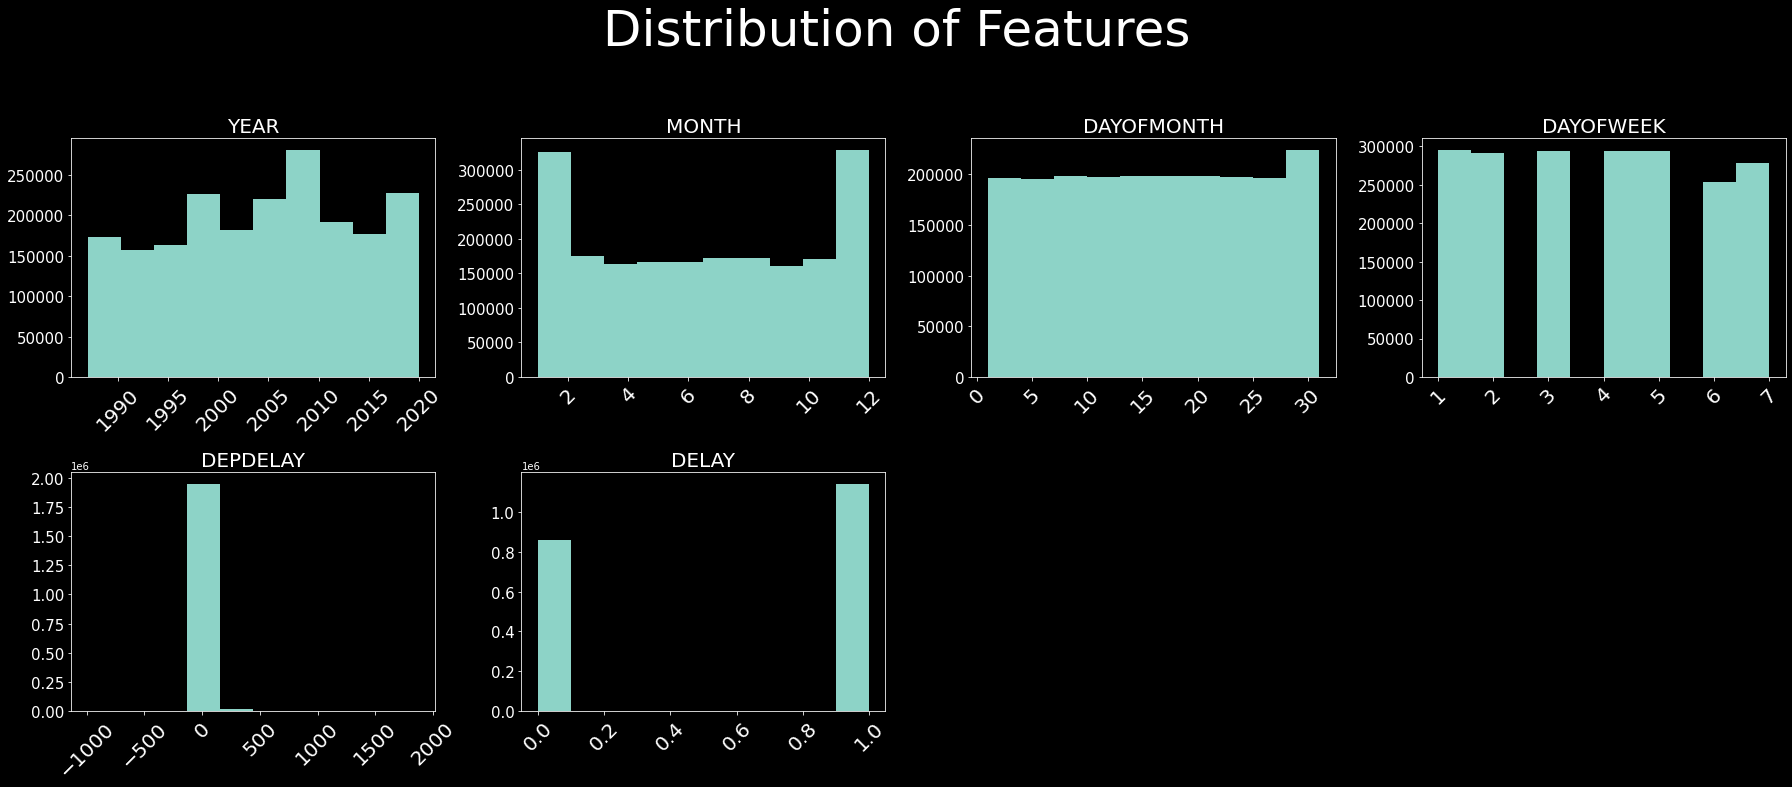

In [172]:
from matplotlib import cm
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,15)) ## Plot Size 
st = fig.suptitle("Distribution of Features", fontsize=50,
                  verticalalignment='center') # Plot Main Title 

for col,num in zip(df.toPandas().describe().columns, range(1,11)):
    ax = fig.add_subplot(3,4,num)
    ax.hist(df.toPandas()[col])
    plt.style.use('dark_background') 
    plt.grid(False)
    plt.xticks(rotation=45,fontsize=20)
    plt.yticks(fontsize=15)
    plt.title(col.upper(),fontsize=20)
plt.tight_layout()
st.set_y(0.95)
fig.subplots_adjust(top=0.85,hspace = 0.4)
plt.show()

In [13]:
from pyspark.sql.functions import isnan, when, count, col
df.select([count(when(isnan(c), c)).alias(c) for c in df.columns]).toPandas().head()

,Year,Month,DayofMonth,DayOfWeek,Reporting_Airline,DepDelay,Delay
0,0,0,0,0,0,0,0


In [14]:
numeric_features = [t[0] for t in df.dtypes if t[1] != 'string']
numeric_features_df=df.select(numeric_features)
numeric_features_df.toPandas().head()

,Year,Month,DayofMonth,DayOfWeek,DepDelay,Delay
0,1998,1,2,5,19.0,0
1,2009,5,28,4,-2.0,1
2,2013,6,29,6,14.0,1
3,2010,8,31,2,0.0,1
4,2006,1,15,7,51.0,0


In [15]:
col_names =numeric_features_df.columns
features = numeric_features_df.rdd.map(lambda row: row[0:])
corr_mat=Statistics.corr(features, method="pearson")
corr_df = pd.DataFrame(corr_mat)
corr_df.index, corr_df.columns = col_names, col_names

corr_df

,Year,Month,DayofMonth,DayOfWeek,DepDelay,Delay
Year,1.000000,-0.035732,0.000435,-0.003430,NaN,0.123178
Month,-0.035732,1.000000,0.007268,0.001870,NaN,0.000496
DayofMonth,0.000435,0.007268,1.000000,-0.000083,NaN,-0.004909
DayOfWeek,-0.003430,0.001870,-0.000083,1.000000,NaN,0.003889
DepDelay,NaN,NaN,NaN,NaN,1.0,NaN
Delay,0.123178,0.000496,-0.004909,0.003889,NaN,1.000000


In [16]:
df2=df
df3=df

In [17]:
stringIndexer = StringIndexer()\
                 .setInputCol ("Reporting_Airline")\
                 .setOutputCol ("Reporting_AirlineIndex")

Airline_udfIndex_model=stringIndexer.fit(df2)
Airline_udfIndex_df=Airline_udfIndex_model.transform(df2)
Airline_udfIndex_df.toPandas().head(10)

,Year,Month,DayofMonth,DayOfWeek,Reporting_Airline,DepDelay,Delay,Reporting_AirlineIndex
0,1998,1,2,5,NW,19.0,0,5.0
1,2009,5,28,4,FL,-2.0,1,15.0
2,2013,6,29,6,MQ,14.0,1,8.0
3,2010,8,31,2,DL,0.0,1,1.0
4,2006,1,15,7,US,51.0,0,4.0
5,1995,11,29,3,DL,0.0,0,1.0
6,2006,8,7,1,CO,-4.0,0,7.0
7,2019,6,11,2,9E,221.0,0,18.0
8,2008,8,3,7,YV,2.0,0,17.0
9,2018,2,8,4,WN,16.0,0,0.0


In [18]:
encoder = OneHotEncoder()\
         .setInputCols (["Reporting_AirlineIndex"])\
         .setOutputCols (["Airline_encoded"])

encoder_model=encoder.fit(Airline_udfIndex_df)
encoder_df=encoder_model.transform(Airline_udfIndex_df)

encoder_df.toPandas().head()

,Year,Month,DayofMonth,DayOfWeek,Reporting_Airline,DepDelay,Delay,Reporting_AirlineIndex,Airline_encoded
0,1998,1,2,5,NW,19.0,0,5.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
1,2009,5,28,4,FL,-2.0,1,15.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2013,6,29,6,MQ,14.0,1,8.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
3,2010,8,31,2,DL,0.0,1,1.0,"(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,2006,1,15,7,US,51.0,0,4.0,"(0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."


In [19]:
import pandas as pd
pd.set_option('display.max_colwidth', 80)
pd.set_option('max_columns', 12)

In [20]:
df.printSchema()

root
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- DayofMonth: integer (nullable = true)
 |-- DayOfWeek: integer (nullable = true)
 |-- Reporting_Airline: string (nullable = true)
 |-- DepDelay: double (nullable = true)
 |-- Delay: integer (nullable = false)



In [21]:
assembler = VectorAssembler()\
         .setInputCols (["Airline_encoded","Year","Month",
                         "DayofMonth","DayOfWeek",\
                         "DepDelay"])\
         .setOutputCol ("vectorized_features")
        

assembler_df=assembler.setHandleInvalid("skip").transform(encoder_df)
assembler_df.toPandas().head()

,Year,Month,DayofMonth,DayOfWeek,Reporting_Airline,DepDelay,Delay,Reporting_AirlineIndex,Airline_encoded,vectorized_features
0,1998,1,2,5,NW,19.0,0,5.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,2009,5,28,4,FL,-2.0,1,15.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2013,6,29,6,MQ,14.0,1,8.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,2010,8,31,2,DL,0.0,1,1.0,"(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,2006,1,15,7,US,51.0,0,4.0,"(0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [22]:
label_indexer = StringIndexer()\
         .setInputCol ("Delay")\
         .setOutputCol ("label")

label_indexer_model=label_indexer.fit(assembler_df)
label_indexer_df=label_indexer_model.transform(assembler_df)

label_indexer_df.select("Delay","label").toPandas().head()

,Delay,label
0,0,1.0
1,1,0.0
2,1,0.0
3,1,0.0
4,0,1.0


In [23]:
scaler = StandardScaler()\
         .setInputCol ("vectorized_features")\
         .setOutputCol ("features")
        
scaler_model=scaler.fit(label_indexer_df)
scaler_df=scaler_model.transform(label_indexer_df)
pd.set_option('display.max_colwidth', 40)
scaler_df.select("vectorized_features","features").toPandas().head(5)

,vectorized_features,features
0,"(0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 4.40479352..."
1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 2.9461867590118818, 0.0, 0.0, ..."
4,"(0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 3.5649185296545..."


In [24]:
#scaler_df.show()

In [25]:
print((scaler_df.count(), len(scaler_df.columns)))

(1963932, 12)


In [26]:
train, test = scaler_df.randomSplit([0.8, 0.2], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 1570813
Test Dataset Count: 393119


In [27]:
train.groupby("Delay").count().show()

+-----+------+
|Delay| count|
+-----+------+
|    1|883084|
|    0|687729|
+-----+------+



In [28]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=100)
lrModel = lr.fit(train)

In [29]:

predictions = lrModel.transform(test)
#predictions_train = lrModel.transform(train)
predictions.select('label', 'features',  'rawPrediction', 'prediction', 'probability').toPandas().head(5)

,label,features,rawPrediction,prediction,probability
0,0.0,"(0.0, 0.0, 3.1077095055255453, 0.0, ...","[0.6202893895134299, -0.620289389513...",0.0,"[0.650284362839095, 0.34971563716090..."
1,1.0,"(0.0, 2.9461867590118818, 0.0, 0.0, ...","[0.5402644443132946, -0.540264444313...",0.0,"[0.6318739320785755, 0.3681260679214..."
2,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.5343950346794333, -0.534395034679...",0.0,"[0.6305075993623178, 0.3694924006376..."
3,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-1.4835305003268089, 1.483530500326...",1.0,"[0.1848947502135124, 0.8151052497864..."
4,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.1913450443520599, 0.191345044352...",1.0,"[0.4523091586349634, 0.5476908413650..."


In [350]:
predictions.head(5)

[Row(Year=1987, Month=10, DayofMonth=1, DayOfWeek=4, Reporting_Airline='AA', DepDelay=0.0, Delay=1, Reporting_AirlineIndex=2.0, Airline_encoded=SparseVector(32, {2: 1.0}), vectorized_features=SparseVector(37, {2: 1.0, 32: 1987.0, 33: 10.0, 34: 1.0, 35: 4.0}), label=0.0, features=SparseVector(37, {2: 3.1077, 32: 215.1006, 33: 2.9084, 34: 0.1139, 35: 2.009}), rawPrediction=DenseVector([0.6203, -0.6203]), probability=DenseVector([0.6503, 0.3497]), prediction=0.0),
 Row(Year=1987, Month=10, DayofMonth=1, DayOfWeek=4, Reporting_Airline='DL', DepDelay=0.0, Delay=0, Reporting_AirlineIndex=1.0, Airline_encoded=SparseVector(32, {1: 1.0}), vectorized_features=SparseVector(37, {1: 1.0, 32: 1987.0, 33: 10.0, 34: 1.0, 35: 4.0}), label=1.0, features=SparseVector(37, {1: 2.9462, 32: 215.1006, 33: 2.9084, 34: 0.1139, 35: 2.009}), rawPrediction=DenseVector([0.5403, -0.5403]), probability=DenseVector([0.6319, 0.3681]), prediction=0.0),
 Row(Year=1987, Month=10, DayofMonth=1, DayOfWeek=4, Reporting_Airli

In [30]:
predictions.printSchema()

root
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- DayofMonth: integer (nullable = true)
 |-- DayOfWeek: integer (nullable = true)
 |-- Reporting_Airline: string (nullable = true)
 |-- DepDelay: double (nullable = true)
 |-- Delay: integer (nullable = false)
 |-- Reporting_AirlineIndex: double (nullable = false)
 |-- Airline_encoded: vector (nullable = true)
 |-- vectorized_features: vector (nullable = true)
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)



In [31]:
print((predictions.count(), len(predictions.columns)))

(393119, 15)


In [32]:
type(predictions)

pyspark.sql.dataframe.DataFrame

In [ ]:
predictions.toPandas().head(5).to_excel("/regressionoutput.xlsx")

In [ ]:
predictions.toPandas().head(5)

In [337]:
class_names=[1.0,0.0]
import itertools
#confusion matrix function
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Normalized confusion matrix
[[0.57027362 0.42972638]
 [0.07801204 0.92198796]]


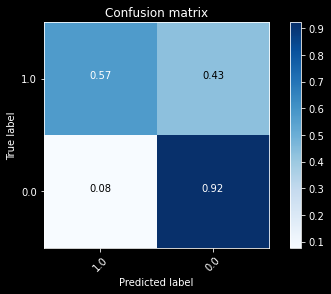

In [338]:
y_true = predictions.select("label")
y_true = y_true.toPandas()

y_pred = predictions.select("prediction")
y_pred = y_pred.toPandas()

cnf_matrix = confusion_matrix(y_true, y_pred,labels=class_names)
#cnf_matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
plt.show()

In [339]:
accuracy = predictions.filter(predictions.label == predictions.prediction).count() / float(predictions.count())
print("Accuracy : ",accuracy*100)

Accuracy :  76.8276272579041


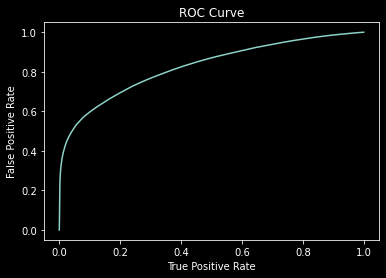

AUC of ROC: 0.8254757897461507


In [340]:
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('AUC of ROC: ' + str(trainingSummary.areaUnderROC))

In [341]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.8269966531695889


In [ ]:
#Decision Tree

In [343]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 7)
dtModel = dt.fit(train)
predictions_dt = dtModel.transform(test)
predictions_dt.select('label', 'features',  'rawPrediction', 'prediction', 'probability').show(10)

+-----+--------------------+-------------------+----------+--------------------+
|label|            features|      rawPrediction|prediction|         probability|
+-----+--------------------+-------------------+----------+--------------------+
|  0.0|(37,[2,32,33,34,3...|[206534.0,120527.0]|       0.0|[0.63148464659497...|
|  1.0|(37,[1,32,33,34,3...|[206534.0,120527.0]|       0.0|[0.63148464659497...|
|  0.0|(37,[21,32,33,34,...|[206534.0,120527.0]|       0.0|[0.63148464659497...|
|  0.0|(37,[21,32,33,34,...| [13027.0,276987.0]|       1.0|[0.04491852117483...|
|  0.0|(37,[22,32,33,34,...|[206534.0,120527.0]|       0.0|[0.63148464659497...|
|  1.0|(37,[11,32,33,34,...|[206534.0,120527.0]|       0.0|[0.63148464659497...|
|  1.0|(37,[4,32,33,34,3...|[473392.0,110862.0]|       0.0|[0.81025033632632...|
|  0.0|(37,[2,32,33,34,3...|[206534.0,120527.0]|       0.0|[0.63148464659497...|
|  0.0|(37,[7,32,33,34,3...|[206534.0,120527.0]|       0.0|[0.63148464659497...|
|  0.0|(37,[1,32,33,34,3...|

In [344]:
evaluator_dt = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator_dt.evaluate(predictions_dt, {evaluator_dt.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.662372279628491


In [345]:
accuracy_dt = predictions_dt.filter(predictions_dt.label == predictions_dt.prediction).count() / float(predictions_dt.count())
print("Accuracy : ",accuracy_dt*100)

Accuracy :  77.01866355988899


Normalized confusion matrix
[[0.60005122 0.39994878]
 [0.09773532 0.90226468]]


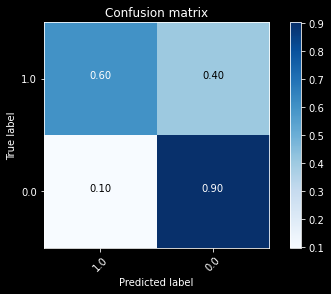

In [346]:
y_true = predictions_dt.select("label")
y_true = y_true.toPandas()

y_pred = predictions_dt.select("prediction")
y_pred = y_pred.toPandas()

cnf_matrix = confusion_matrix(y_true, y_pred,labels=class_names)
#cnf_matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
plt.show()